<a href="https://colab.research.google.com/github/Konovalo/excel/blob/main/%D0%A1%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# Разделим данные на признаки и целевую переменную
x = data.drop(columns = "Price")
y = data["Price"]

In [ ]:
# Убираем утечки
# В колонке метод данные, которые говорят случилась продажа или нет,
# раньше случилась или позже - эти данные нам не нужны так как не несут для нас информации
# Удалим эту калонку
x = x.drop(columns = "Method")

In [ ]:
# Проверим, есть ли пропущенные значения
import numpy as np

rez = x.isna()
rez
# Такие занчения есть, например BuildingArea

,Suburb,Address,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
6805,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
6806,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
6807,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [ ]:
# так как на эту таблицу не очень удобно смотреть,
# поэтому мы просуммируем и узнаем статистику по всем столбцам
x.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
SellerG             1
Date                1
Distance            1
Postcode            1
Bedroom2            1
Bathroom            1
Car                 1
Landsize            1
BuildingArea     2992
YearBuilt        2445
CouncilArea         1
Lattitude           1
Longtitude          1
Regionname          1
Propertycount       1
dtype: int64

In [ ]:
# везде где пропущенные значения заменим на среднее по колонке
a = x["Car"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6804    False
6805    False
6806    False
6807    False
6808     True
Name: SellerG, Length: 6809, dtype: bool

In [ ]:
# Выбрали только те строки, в которых знаечние было Nan
x.loc[x["Car"].isna(), "Car"]

6808    NaN
Name: SellerG, dtype: object

In [ ]:
# Запишем теперь среднее значение по колонке
x.loc[x["Car"].isna(), "Car"] = x["Car"].maen()

,Suburb,Address,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,Brunswick East,106/360 Lygon St,2,u,Jellis,28/05/2016,4.5,3057.0,2.0,2.0,1.0,0.0,NaN,NaN,Moreland,-37.7679,144.9725,Northern Metropolitan,5533.0
6805,Brunswick East,18/408 Lygon St,2,u,Jellis,28/05/2016,4.5,3057.0,2.0,1.0,1.0,0.0,NaN,NaN,Moreland,-37.7650,144.9731,Northern Metropolitan,5533.0
6806,Brunswick East,28/29 Nunan St,3,u,hockingstuart,28/05/2016,4.5,3057.0,2.0,1.0,1.0,0.0,NaN,NaN,Moreland,-37.7603,144.9795,Northern Metropolitan,5533.0
6807,Brunswick East,3/14 Oconnor St,2,t,Nelson,28/05/2016,4.5,3057.0,2.0,2.0,2.0,0.0,NaN,NaN,Moreland,-37.7736,144.9725,Northern Metropolitan,5533.0


In [ ]:
#Остальные столбцы или строки с кактегориальными
# признаками и большим количеством отклонений придестя удалить
# Если необходимо что-то заполнить (например дату постройки) и этот признак очень важный,
# то можно заполнить средним значением и создать колонку, которая будет бинарная
# показывать мы заполнили это значение или нет - это может помочь нашему алгоритму

In [ ]:
# Определим типы признаков
list(zip(x.columns, x.dtypes))
# Создай список названия столбца и тип данных его значений

[('Suburb', dtype('O')),
 ('Address', dtype('O')),
 ('Rooms', dtype('int64')),
 ('Type', dtype('O')),
 ('SellerG', dtype('O')),
 ('Date', dtype('O')),
 ('Distance', dtype('float64')),
 ('Postcode', dtype('float64')),
 ('Bedroom2', dtype('float64')),
 ('Bathroom', dtype('float64')),
 ('Car', dtype('float64')),
 ('Landsize', dtype('float64')),
 ('BuildingArea', dtype('float64')),
 ('YearBuilt', dtype('float64')),
 ('CouncilArea', dtype('O')),
 ('Lattitude', dtype('float64')),
 ('Longtitude', dtype('float64')),
 ('Regionname', dtype('O')),
 ('Propertycount', dtype('float64'))]

In [ ]:
# Исследуемколонки Address, Postcode, Suburb
# посмотрим насколько различные значения в каждой колонке
rez = x["Suburb"].value_counts()
rez
# Значений довольно много и мы скорей всего не хотели бы использовать такой кодигориальный признак,
# но он важный и надо что-то придумать


Reservoir             227
Richmond              185
Bentleigh East        182
Preston               153
South Yarra           141
                     ... 
Essendon North         12
Williamstown North     10
Bellfield               9
Caulfield               8
Kooyong                 1
Name: Suburb, Length: 112, dtype: int64

In [ ]:
# Возьмем все начения этого признака, которые встречаются менее чем в 200 записях и заменим их на одно слово
zamena = x["Suburb"].applay(lambda x: rez[x] < 200)
x.loc[zamena, "Suburb"] = "RaseSuburb"
# x = x.drop() ВЫкидываем колонки, которые хотели выкинуть

In [21]:
# One-hot-encoding Посмотрим на котигориальные признаки
x = pd.get_dummies(x, columns = categorical_cols)

NameError: ignored

NameError: ignored

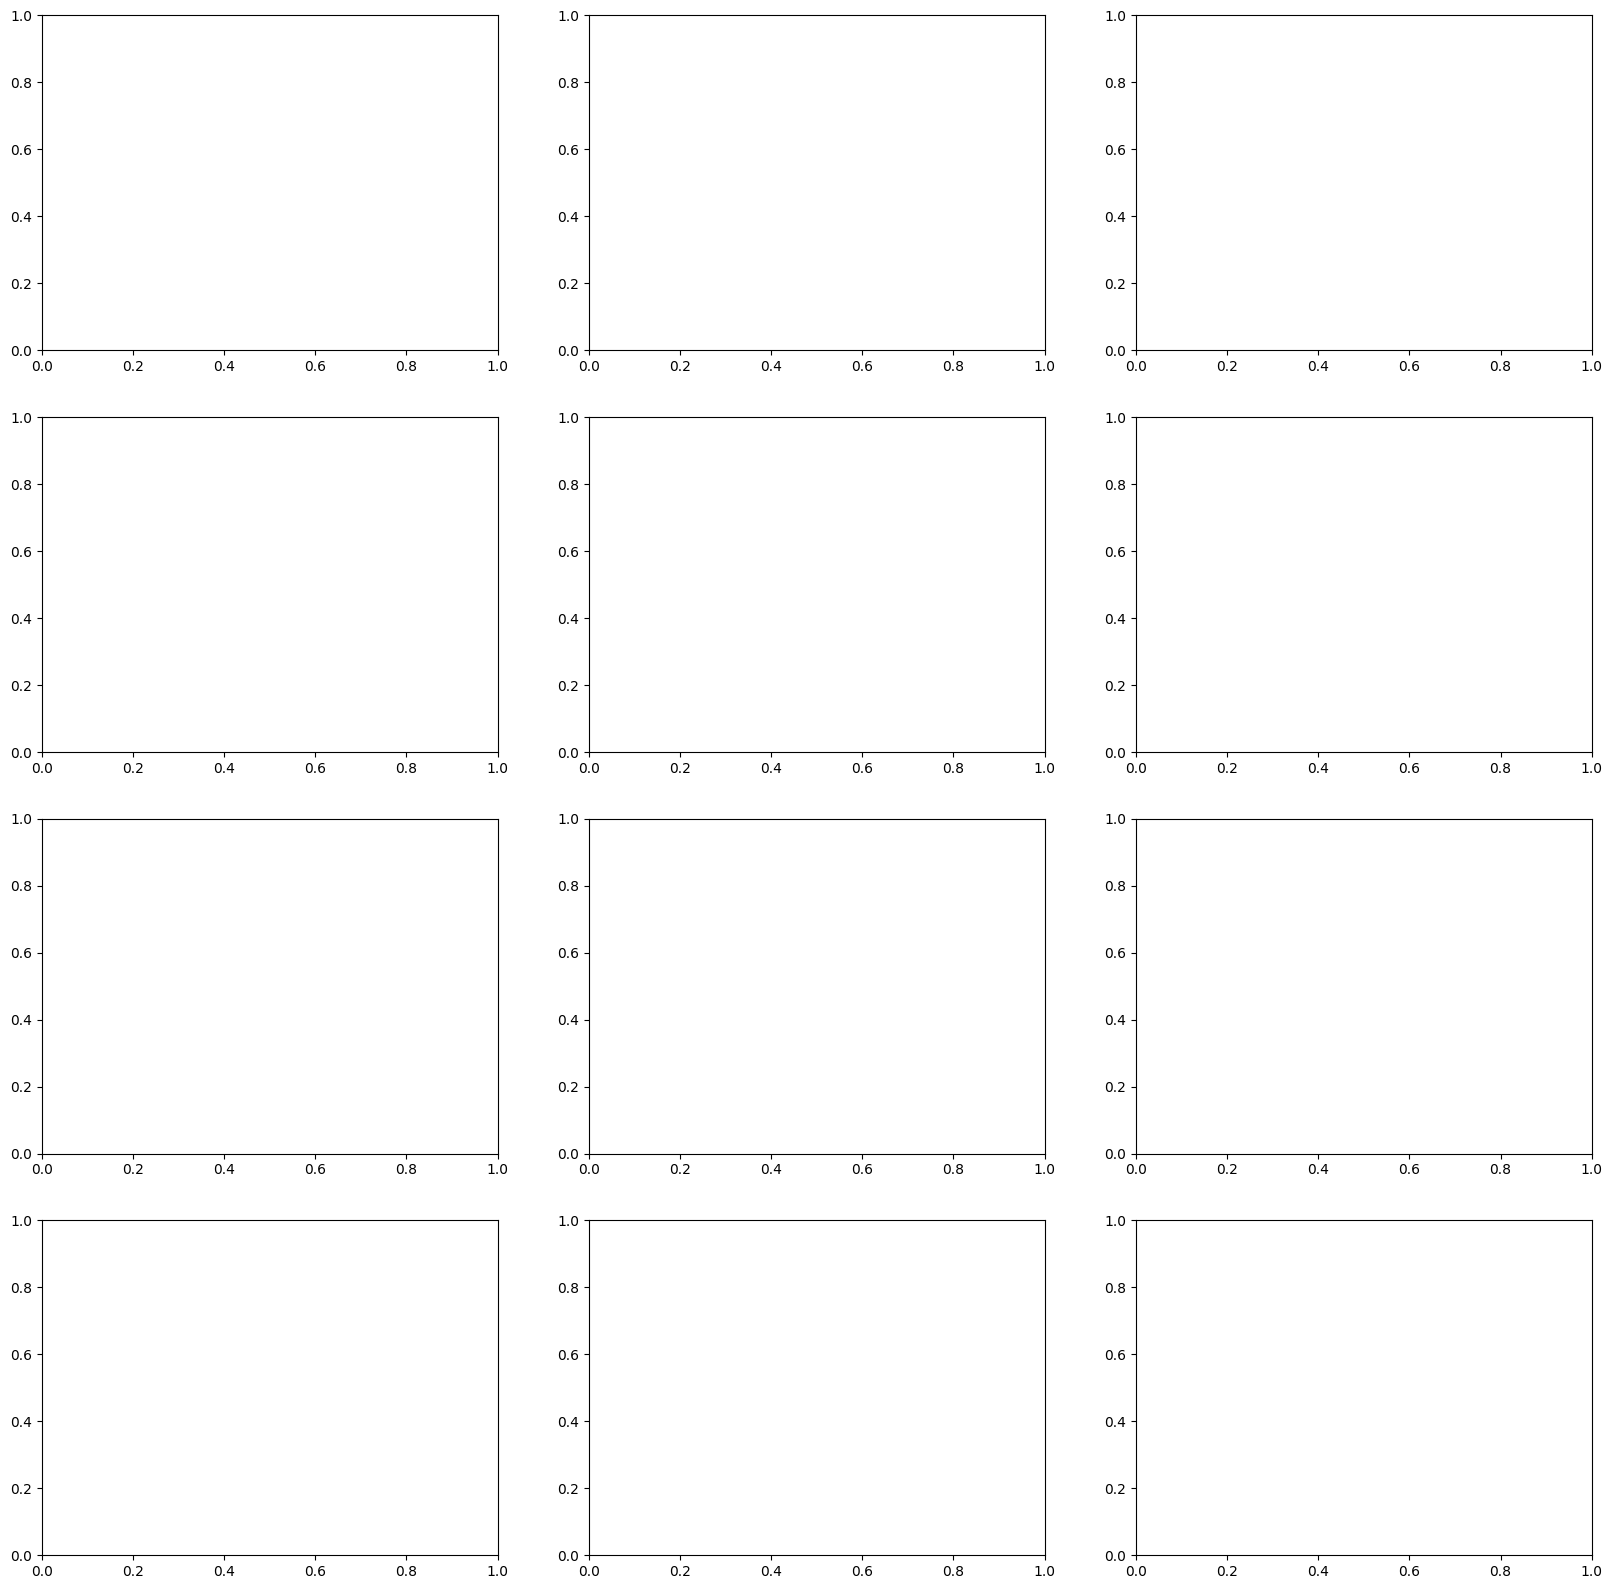

In [22]:
# Найдем выбросы
import matplotlib.pyplot as plt

for ax, num_col_name in zip(plt.subplots(4, 3, figsize=(20,20))[1].flatten(), numerical_cols):
    ax.set_title(num_col_name)
    ax.boxplot(X[num_col_name])